# Purpose
Get an overview of the available data and possibilities in order have a general understanding of it in the following data preparation (especially uses as a preparation for the merging process in QGIS)



In [3]:
import geopandas as gpd
import pandas as pd
import numpy as np
pd.options.display.max_columns = None
unfaelle = gpd.read_file('../01_Source/unfaelle_berlin.geojson')
verkehrsmengen = gpd.read_file('../01_Source/Verkehrsmengen.geojson') 
ampeln = gpd.read_file('../01_Source/Ampeln.geojson')
laerm = gpd.read_file('../01_Source/Laerm.geojson')
bodenrichtwerte = gpd.read_file('../01_Source/Bodenrichtwerte.geojson')
tempolimits = gpd.read_file('../01_Source/Tempolimits.geojson') 
merge3 = gpd.read_file('../01_Source/U_VM_A_L_BRW_NEU.geojson') 


Unfallart (Feld "UART")
1 = Zusammenstoß mit anfahrendem/anhaltendem/ruhendem Fahrzeug
2 = Zusammenstoß mit vorausfahrendem/wartendem Fahrzeug
3 = Zusammenstoß mit seitlich in gleicher Richtung fahrendem Fahrzeug
4 = Zusammenstoß mit entgegenkommendem Fahrzeug
5 = Zusammenstoß mit einbiegendem / kreuzendem Fahrzeug
6 = Zusammenstoß zwischen Fahrzeug und Fußgänger
7 = Aufprall auf Fahrbahnhindernis
8 = Abkommen von Fahrbahn nach rechts
9 = Abkommen von Fahrbahn nach links
0 = Unfall anderer Art

Unfallkategorie (Feld "UKATEGORIE")
1 = Unfall mit Getöteten
2 = Unfall mit Schwerverletzten
3 = Unfall mit Leichtverletzten


Unfalltyp (Feld "UTYP" bzw. "UTYP1")
1 = Fahrunfall
2 = Abbiegeunfall
3 = Einbiegen / Kreuzen-Unfall
4 = Überschreitenunfall
5 = Unfall durch ruhenden Verkehr
6 = Unfall im Längsverkehr
7 = sonstiger Unfall

Lichtverhältnisse (Feld "LICHT"):
0 = Tageslicht
1 = Dämmerung
2 = Dunkelheit

Straßenzustand (Feld "STRZUSTAND"):
0 = trocken
1 = nass/feucht/schlüpfrig
2 = winterglatt

Wochentag 
1 = Sonntag
2 = Montag
3 = Dienstag
4 = Mittwoch
5 = Donnerstag
6 = Freitag
7 = Samstag


Die in den Rohdaten enthaltenen Spalten ULAND, UREGBEZ, UKREIS, UGEMEINDE bilden den Amtlichen Gemeindeschlüssel ab. Die Kodierung ist hier abrufbar:
https://www.destatis.de/DE/ZahlenFakten/LaenderRegionen/Regionales/Gemeindeverzeichnis/Administrativ/Archiv/GVAuszugQ/AuszugGV3QAktuell.html

Die Werte in den Feldern LINREFX und LINREFY bilden die Koordinate des auf dem Straßenabschnitt liegenden Unfallortes (UTM-Koordinate des Referenzsystems ETRS89, Zone 32N).

In [4]:
unfaelle = unfaelle.drop(["ULAND","UREGBEZ","UJAHR"], axis=1)
unfaelle["UWOCHENTAG"] = unfaelle["UWOCHENTAG"] - 1
unfaelle["UWOCHENTAG"] = unfaelle["UWOCHENTAG"].replace(0, 7)
#To Do für später decodieren von UKreis und UGemeinde
unfaelle.describe()

,OBJECTID,UKREIS,UGEMEINDE,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY
count,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,1.364900e+04
mean,190757.504506,5.424793,5.424793,6.728405,13.473441,3.582680,2.834640,3.626713,3.887171,0.446699,0.380321,0.817056,0.151147,0.157814,0.032457,0.133050,0.195472,797784.714863,5.826565e+06
std,30324.889510,3.495025,3.495025,3.175898,4.773724,1.831544,0.379519,2.147327,1.895501,0.796455,0.485483,0.386635,0.358205,0.364580,0.177216,0.339641,0.408232,6614.330070,5.157698e+03
min,112695.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,778444.698700,5.809746e+06
25%,198395.000000,2.000000,2.000000,4.000000,10.000000,2.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,793462.791500,5.823267e+06
50%,201810.000000,5.000000,5.000000,7.000000,14.000000,4.000000,3.000000,5.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,797762.199400,5.826844e+06
75%,205222.000000,8.000000,8.000000,9.000000,17.000000,5.000000,3.000000,5.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,801550.244200,5.829905e+06
max,208853.000000,12.000000,12.000000,12.000000,23.000000,7.000000,3.000000,9.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,822060.509200,5.842633e+06


In [5]:

unfaelle.head()

,OBJECTID,UKREIS,UGEMEINDE,UMONAT,USTUNDE,UWOCHENTAG,UKATEGORIE,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,geometry
0,112705,12,12,1,11,1,3,2,6,0,0,1,0,0,0,0,0,790639.5854,5.835010e+06,MULTIPOINT (790639.585 5835009.589)
1,112837,12,12,1,21,6,3,0,1,2,0,0,0,1,0,0,1,794735.9234,5.833764e+06,MULTIPOINT (794735.923 5833763.947)
2,113020,12,12,1,7,5,3,0,7,1,0,0,0,1,0,0,1,790106.5030,5.836070e+06,MULTIPOINT (790106.503 5836069.675)
3,113205,12,12,1,7,2,3,6,2,1,0,1,1,0,0,0,2,792159.9652,5.838427e+06,MULTIPOINT (792159.965 5838427.271)
4,113456,12,12,1,12,3,3,2,6,0,0,1,0,0,0,1,1,791035.8465,5.841190e+06,MULTIPOINT (791035.846 5841190.008)


In [6]:
unfaelle.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13649 entries, 0 to 13648
Data columns (total 20 columns):
OBJECTID       13649 non-null int64
UKREIS         13649 non-null int64
UGEMEINDE      13649 non-null int64
UMONAT         13649 non-null int64
USTUNDE        13649 non-null int64
UWOCHENTAG     13649 non-null int64
UKATEGORIE     13649 non-null int64
UART           13649 non-null int64
UTYP1          13649 non-null int64
ULICHTVERH     13649 non-null int64
IstRad         13649 non-null int64
IstPKW         13649 non-null int64
IstFuss        13649 non-null int64
IstKrad        13649 non-null int64
IstGkfz        13649 non-null int64
IstSonstige    13649 non-null int64
STRZUSTAND     13649 non-null int64
LINREFX        13649 non-null float64
LINREFY        13649 non-null float64
geometry       13649 non-null geometry
dtypes: float64(2), geometry(1), int64(17)
memory usage: 2.1 MB


Verkehrsmengen 2014 (Umweltatlas)

Dargestellt werden die Verkehrsmengen im übergeordneten Straßennetz des Landes Berlin, welches als Grundlage u.a. für die Zwecke der Lärmminderungs- und Luftreinhalteplanung dient.
Die wesentlichen Grundlagen für die hier dargestellten Verkehrsmengen als DTV bilden die Kfz- und Lkw-Daten aus der vorliegenden Verkehrsstärkenkarte 2014 DTVw (DTV werktags) der Senatsverwaltung für Umwelt, Verkehr und Klimaschutz.
Die durchschnittliche tägliche Verkehrsstärke (DTV) ist der Mittelwert über alle Tage des Jahres für die Zahl der einen Straßenquerschnitt in beiden Fahrtrichtungen täglich passierenden Kraftfahrzeuge einschließlich Lkw, Motorräder und Busse.
Angaben zur durchschnittlichen werktäglichen Verkehrsstärke (DTVw) finden Sie hier: https://www.berlin.de/senuvk/verkehr/lenkung/vlb/de/erhebungen.shtml.

Ausführliche Informationen finden Sie in den Begleittexten der im Umweltatlas Berlin veröffentlichten Karten zum Thema Verkehrsmengen 07.01 (Ausgabe 2017).

Internet: http://www.stadtentwicklung.berlin.de/umwelt/umweltatlas/din_701.htm.



Verkehrsmengen 2014 (Umweltatlas)

Anzahl der Kraftfahrzeuge je 24 Stunden 2014 im übergeordneten Straßennetz incl. Pkw, Lkw, Motorräder, Lieferwagen, Linien- und Reisebusse als durchschnittliche tägliche Verkehrsstärke (DTV)

Feldname	Beschreibung
LINK_ID	Schlüssel
METER	Länge des Abschnittes [m]
STRASSE	Name des Straßenabschnittes
DTV	Durchschnittliche tägliche Verkehrsstärke (DTV) Kfz
PKW	DTV Pkw
LKW	DTV Lkw > 3,5 t (ohne Busse)
LIEFERWAGEN	DTV Lieferwagen ≤ 3,5 t
LINIENBUSSE	DTV Linienbusse
REISEBUSSE	DTV Reisebusse
KRAD	DTV Motorräder
HERKUNFT	Quelle Kfz-Daten
Ausführliche Informationen finden Sie in den Begleittexten der im Umweltatlas Berlin veröffentlichten Karte 07.01.
Internet: http://www.stadtentwicklung.berlin.de/umwelt/umweltatlas/id701.htm

In [7]:
verkehrsmengen.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 11 columns):
METER          10086 non-null float64
STR_NAME       10086 non-null object
DTV            10086 non-null float64
PKW            10086 non-null float64
LKW            10086 non-null float64
LIEFERWAGEN    10086 non-null float64
LINIENBUSSE    10086 non-null float64
REISEBUSSE     10086 non-null float64
KRAD           10086 non-null float64
HERKUNFT       10038 non-null object
geometry       10086 non-null geometry
dtypes: float64(8), geometry(1), object(2)
memory usage: 866.8+ KB


In [8]:

verkehrsmengen["ANTEIL_PKW"] = verkehrsmengen["PKW"]*100/verkehrsmengen["DTV"]
verkehrsmengen["ANTEIL_PKW"] = verkehrsmengen["ANTEIL_PKW"].fillna(0)
verkehrsmengen["ANTEIL_LKW"] = verkehrsmengen["LKW"]*100/verkehrsmengen["DTV"]
verkehrsmengen["ANTEIL_LKW"] = verkehrsmengen["ANTEIL_LKW"].fillna(0)
verkehrsmengen["ANTEIL_LIEFERWAGEN"] = verkehrsmengen["LIEFERWAGEN"]*100/verkehrsmengen["DTV"]
verkehrsmengen["ANTEIL_LIEFERWAGEN"] = verkehrsmengen["ANTEIL_LIEFERWAGEN"].fillna(0)
verkehrsmengen["ANTEIL_LINIENBUSSE"] = verkehrsmengen["LINIENBUSSE"]*100/verkehrsmengen["DTV"]
verkehrsmengen["ANTEIL_LINIENBUSSE"] = verkehrsmengen["ANTEIL_LINIENBUSSE"].fillna(0)
verkehrsmengen.loc[verkehrsmengen["ANTEIL_LINIENBUSSE"] == np.inf, ['DTV']] = verkehrsmengen.loc[verkehrsmengen["ANTEIL_LINIENBUSSE"] == np.inf, ['LINIENBUSSE']]
verkehrsmengen.loc[verkehrsmengen["ANTEIL_LINIENBUSSE"] == np.inf, ['ANTEIL_LINIENBUSSE']] = 100
verkehrsmengen["ANTEIL_REISEBUSSE"] = verkehrsmengen["REISEBUSSE"]*100/verkehrsmengen["DTV"]
verkehrsmengen["ANTEIL_REISEBUSSE"] = verkehrsmengen["ANTEIL_REISEBUSSE"].fillna(0)
verkehrsmengen["ANTEIL_KRAD"] = verkehrsmengen["KRAD"]*100/verkehrsmengen["DTV"]
verkehrsmengen["ANTEIL_KRAD"] = verkehrsmengen["ANTEIL_KRAD"].fillna(0)
verkehrsmengen = verkehrsmengen.drop(["METER","HERKUNFT","PKW","LKW","LIEFERWAGEN","LINIENBUSSE","REISEBUSSE","KRAD"], axis=1)
verkehrsmengen.head()

,STR_NAME,DTV,geometry,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD
0,Alt-Buch,12960.0,"LINESTRING (398257.364 5832698.211, 398290.273...",81.574074,4.768519,10.200617,1.774691,0.246914,1.435185
1,Alt-Buch,12960.0,"LINESTRING (398324.724 5832720.497, 398335.699...",81.728395,4.768519,10.200617,1.620370,0.246914,1.435185
2,Alt-Buch,12960.0,"LINESTRING (398437.824 5832759.259, 398454.167...",81.805556,4.768519,10.200617,1.543210,0.246914,1.435185
3,Alte Kaulsdorfer Str.,7258.0,"LINESTRING (403377.118 5813297.220, 403379.105...",83.742078,1.804905,10.209424,2.066685,0.027556,2.149352
4,Alte Schönhauser Str.,2764.0,"LINESTRING (391884.118 5820618.870, 391898.317...",81.114327,2.894356,10.202605,0.000000,0.578871,5.209841


In [9]:
verkehrsmengen.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 10086 entries, 0 to 10085
Data columns (total 9 columns):
STR_NAME              10086 non-null object
DTV                   10082 non-null float64
geometry              10086 non-null geometry
ANTEIL_PKW            10086 non-null float64
ANTEIL_LKW            10086 non-null float64
ANTEIL_LIEFERWAGEN    10086 non-null float64
ANTEIL_LINIENBUSSE    10086 non-null float64
ANTEIL_REISEBUSSE     10086 non-null float64
ANTEIL_KRAD           10086 non-null float64
dtypes: float64(7), geometry(1), object(1)
memory usage: 709.2+ KB


Wie zu mergen? MULTIPOINT Auf Linestring --> Liegt der Punkt auf der Straße <br/> 
Welche Spots sind relativ zur Verkehrsmenge unsicher 
Gibt es Korrelationen zwischen einem erhöhten Anteil an bestimmten Fahrzeugtypen und gefährlichen Unfallstellen.


In [26]:
ampeln.head()

,NAME,KNAME,geometry
0,Müllerstr. / Schulzendorfer Str. - Sellerstr.,01001,POINT (389482.928 5822340.930)
1,Müllerstr. / Fennstr.,01002,POINT (389354.787 5822474.063)
2,Müllerstr. / Lindower Str. - Lynarstr.,01003,POINT (389202.940 5822641.359)
3,Müllerstr. / Gerichtstr. - Triftstr.,01004,POINT (388916.000 5822904.000)
4,Müllerstr. / Luxemburger Str. - Schulstr,01005,POINT (388733.356 5823078.790)


Wie zu mergen? MULTIPoint auf Point <br/> 
Woher weiß ich, dass ein Unfallspunkt an einer Ampel stattgefunden hat.

https://fbinter.stadt-berlin.de/fb_daten/beschreibung/brw/BRW_Vorblatt_2019.pdf
Helfen Ampeln bei der Reduktion von Abbiege und Kreuzunfällen

In [27]:
bodenrichtwerte = bodenrichtwerte.drop(["GEMEINDE","BEZIRK","VERFAHRENSART","STICHTAG","BEITRAGSZUSTAND","LUMNUM"], axis=1)
bodenrichtwerte.head()

,ANWERT,BRW,NUTZUNG,GFZ,geometry
0,None,500,W - Wohngebiet,0.7,"POLYGON ((378075.888 5825093.591, 378105.795 5..."
1,None,6500,M1 - Kerngebiet,4.5,"POLYGON ((392611.666 5819396.990, 392646.717 5..."
2,None,2500,W - Wohngebiet,0.6,"POLYGON ((387458.479 5819663.963, 387462.024 5..."
3,None,360,W - Wohngebiet,0.4,"POLYGON ((397541.418 5810882.744, 397551.203 5..."
4,None,60,G - Gewerbe,NaN,"MULTIPOLYGON (((394216.175 5833905.236, 394164..."


In [28]:
bodenrichtwerte.describe()

,GFZ
count,855.000000
mean,1.196140
std,1.102752
min,0.100000
25%,0.400000
50%,0.800000
75%,1.600000
max,4.500000


Mergen -> Liegt der Unfallsort im Polygon

Tempolimits

In der Karte sind für das gesamte Berliner Straßennetz die von den jeweils zuständigen Behörden (zentrale Straßenverkehrsbehörde bei der Verkehrslenkung Berlin für das Hauptnetz/StEP-Netz, bezirkliche Straßenverkehrsbehörden für das Nebennetz/nicht StEP-Netz sowie die Straßenbaulastträger) angeordneten Höchstgeschwindigkeiten dargestellt. Hierbei wird Tempo 50 (als gemäß StVO allgemeingültige Höchstgeschwindigkeit in Ortschaften) nicht explizit ausgewiesen, sondern nur die Abweichungen hiervon – lediglich im Autobahnnetz wird auch eine angeordnete Höchstgeschwindigkeit von 50 km/h dargestellt.

Über die Sachdatenabfrage lassen sich, bezogen auf einen Straßenabschnitt, weitere Merkmale zu der jeweils angeordneten zulässigen Höchstgeschwindigkeit ermitteln, z.B. der Grund der Anordnung (wie Schulwegsicherung, Lärmschutz oder dgl.) oder eine Einschränkung der zeitlichen Gültigkeit (z.B. Mo-Fr 6:00-9:00 Uhr).

In der Karte dargestellte Geschwindigkeitsangaben sind auf das sog. Detailnetz Berlin, dem einheitlichen Straßennetz Berlins für verkehrliche Belange, referenziert.

In [29]:
#bodenrichtwerte = bodenrichtwerte.drop(["ELEM_NR","VRICHT_TXT","VERFAHRENSART","STICHTAG","BEITRAGSZUSTAND","LUMNUM"], axis=1)
tempolimits.head()

,ELEM_NR,VRICHT_TXT,WERT_VES,ZEIT_T,TAG_T,DURCH_T,DANN_T,DAT_T,geometry
0,62550035_63550004.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,"MULTILINESTRING ((407859.700 5820238.792, 4080..."
1,62550029_62550020.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,"MULTILINESTRING ((407872.095 5820573.080, 4078..."
2,62540035_62550024.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,"MULTILINESTRING ((407917.759 5819968.557, 4079..."
3,62540035_62540036.02,beide Richtungen,30.0,None,None,angeordnete Verkehrseinschränkung,None,None,"MULTILINESTRING ((407914.056 5819968.285, 4079..."
4,62550001_62550021.01,beide Richtungen,30.0,07:00 - 17:00,Montag bis Freitag,Kinder,Zeitangabe,None,"MULTILINESTRING ((407935.307 5820859.254, 4079..."


In [17]:
from bs4 import BeautifulSoup
import requests
import numpy as np

#scrape data
page = requests.get('http://www.wetter-berlin-online.de/j2018.htm')
soup = BeautifulSoup(page.content, 'lxml')

table = soup.find(text='Datum').find_parent('table')
df_wetter2018 = pd.read_html(str(table))[0]

#drop last 7 rows
df_wetter2018.drop(df_wetter2018.tail(7).index,inplace=True)

#clean data
df_wetter2018 = df_wetter2018.filter(['Datum','ATp. +10m', 'Rel. Feuchte', 'Luftdruck', 'Regen', 'Wind-Geschw.', 'Sonnenschein', 'Helligkeit', 'Solar', 'Taupunkt', 'Windchill'])
df_wetter2018 = df_wetter2018.rename(index=str, columns={"Datum": "date", "ATp. +10m": "Grad"})

df_wetter2018 = df_wetter2018.apply(lambda x: x.str.replace(',','.'))
df_wetter2018['Grad'] = df_wetter2018['Grad'].str.rstrip('°C')
df_wetter2018['Rel. Feuchte'] = df_wetter2018['Rel. Feuchte'].str.rstrip('%')
df_wetter2018['Luftdruck'] = df_wetter2018['Luftdruck'].str.rstrip('hPa')
df_wetter2018['Regen'] = df_wetter2018['Regen'].str.rstrip('l/m²')
df_wetter2018['Wind-Geschw.'] = df_wetter2018['Wind-Geschw.'].str.slice(0, -12)
df_wetter2018['Sonnenschein'] = df_wetter2018['Sonnenschein'].str.rstrip('h')
df_wetter2018['Solar'] = df_wetter2018['Solar'].str.rstrip('W/m²')
df_wetter2018['Taupunkt'] = df_wetter2018['Taupunkt'].str.rstrip('°C')
df_wetter2018['Windchill'] = df_wetter2018['Windchill'].str.rstrip('°C')


for index, row in df_wetter2018.iterrows():
    if ('klux' in row['Helligkeit']):
        row['Helligkeit'] = row['Helligkeit'].rstrip('klux')
        row['Helligkeit'].replace(",", ".")
        value = round(float(row['Helligkeit']) *1000,2)
        row['Helligkeit'] = str(value)
    else:
        row['Helligkeit'] = row['Helligkeit'].rstrip('lux')

row['Helligkeit'] = pd.to_numeric(row['Helligkeit'])


df_wetter2018['date'] = pd.to_datetime(df_wetter2018['date'])

df_wetter2018['date'] = df_wetter2018['date'].dt.strftime('%Y-%m-%d')
df_wetter2018 = df_wetter2018.drop(["Rel. Feuchte","Sonnenschein","Solar","Taupunkt","Windchill","Helligkeit"], axis=1)

In [16]:

df_wetter2018.describe()


,date,Grad,Luftdruck,Regen,Wind-Geschw.,Helligkeit
count,359,359,359,359,359,359
unique,359,209,211,34,166,195
top,2018-02-04,1.6,0.0,0.0,4.2,0
freq,1,6,23,243,8,119


In [32]:
len(merge3["OBJECTID"].unique().tolist())

13649

In [76]:
merge3 = merge3.drop(["ULAND","UREGBEZ","UJAHR"], axis=1)
merge3["ANTEIL_PKW"] = merge3["PKW"]*100/merge3["DTV"]
merge3["ANTEIL_PKW"] = merge3["ANTEIL_PKW"].fillna(0)
merge3["ANTEIL_LKW"] = merge3["LKW"]*100/merge3["DTV"]
merge3["ANTEIL_LKW"] = merge3["ANTEIL_LKW"].fillna(0)
merge3["ANTEIL_LIEFERWAGEN"] = merge3["LIEFERWAGEN"]*100/merge3["DTV"]
merge3["ANTEIL_LIEFERWAGEN"] = merge3["ANTEIL_LIEFERWAGEN"].fillna(0)
merge3["ANTEIL_LINIENBUSSE"] = merge3["LINIENBUSSE"]*100/merge3["DTV"]
merge3["ANTEIL_LINIENBUSSE"] = merge3["ANTEIL_LINIENBUSSE"].fillna(0)
merge3.loc[merge3["ANTEIL_LINIENBUSSE"] == np.inf, ['DTV']] = merge3.loc[merge3["ANTEIL_LINIENBUSSE"] == np.inf, ['LINIENBUSSE']]
merge3.loc[merge3["ANTEIL_LINIENBUSSE"] == np.inf, ['ANTEIL_LINIENBUSSE']] = 100
merge3["ANTEIL_REISEBUSSE"] = merge3["REISEBUSSE"]*100/merge3["DTV"]
merge3["ANTEIL_REISEBUSSE"] = merge3["ANTEIL_REISEBUSSE"].fillna(0)
merge3["ANTEIL_KRAD"] = merge3["KRAD"]*100/merge3["DTV"]
merge3["ANTEIL_KRAD"] = merge3["ANTEIL_KRAD"].fillna(0)
merge3 = merge3.drop(["METER","HERKUNFT","PKW","LKW","LIEFERWAGEN","LINIENBUSSE","REISEBUSSE","KRAD"], axis=1)
merge3 = merge3.drop(["GEMEINDE","BEZIRK","VERFAHRENSART","STICHTAG","BEITRAGSZUSTAND","LUMNUM"], axis=1)
# Feld Nahe Ampel erzeugen
merge3['NAHE_AMPEL'] = 0
merge3.loc[~merge3["KNAME"].isna(), ['NAHE_AMPEL']] = 1
merge3 = merge3.drop(["NAME","KNAME","PLR_NAME"], axis=1)

#Unfallkategorie (Feld "UKATEGORIE") 1 = Unfall mit Getöteten 2 = Unfall mit Schwerverletzten 3 = Unfall mit Leichtverletzten
merge3 = pd.get_dummies(merge3, columns=["UKATEGORIE"], prefix='UKATEGORIE')

In [77]:
merge3.head()

,OBJECTID,UKREIS,UGEMEINDE,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,STR_NAME,DTV,EW2010,VBUS,VBUS_PERS,GESLAERM,GESLAERM_PERS,ANWERT,BRW,NUTZUNG,GFZ,geometry,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,NAHE_AMPEL,UKATEGORIE_1,UKATEGORIE_2,UKATEGORIE_3
0,199408,1,1,4,16,5,1,5,0,1,0,0,0,0,1,0,799723.3592,5.827459e+06,Jannowitzbrücke,17010.0,8107.0,sehr hoch,sehr hoch,sehr hoch,sehr hoch,None,6500,M1 - Kerngebiet,4.5,"MULTIPOLYGON (((799733.359 5827458.739, 799732...",82.704292,3.421517,10.205761,0.411523,0.376249,2.880658,0,0,0,1
1,201492,1,1,6,18,6,1,5,0,1,1,0,0,0,1,0,799718.0909,5.827388e+06,Jannowitzbrücke,17010.0,8107.0,sehr hoch,sehr hoch,sehr hoch,sehr hoch,None,6500,M1 - Kerngebiet,4.5,"MULTIPOLYGON (((799728.091 5827388.275, 799727...",82.763081,3.421517,10.205761,0.352734,0.376249,2.880658,0,0,0,1
2,199878,1,1,4,12,6,0,2,0,1,1,0,1,0,0,0,799730.1678,5.827540e+06,Holzmarktstr.,28800.0,8168.0,hoch,sehr hoch,hoch,hoch,None,6500,M1 - Kerngebiet,4.5,"MULTIPOLYGON (((799740.168 5827539.924, 799739...",82.062500,3.416667,10.201389,0.625000,0.451389,3.243056,1,0,0,1
3,199728,9,9,4,15,3,0,7,0,0,1,0,0,0,1,0,805815.7681,5.819631e+06,Sterndamm,8280.0,7678.0,mittel,hoch,mittel,mittel,None,360,W - Wohngebiet,0.4,"MULTIPOLYGON (((805825.768 5819630.742, 805825...",79.734300,3.333333,10.193237,4.468599,0.193237,2.077295,0,0,0,1
4,205339,9,9,9,9,2,6,2,0,0,1,1,0,0,0,0,805817.2609,5.819649e+06,Sterndamm,8280.0,7678.0,mittel,hoch,mittel,mittel,None,360,W - Wohngebiet,0.4,"MULTIPOLYGON (((805827.261 5819648.791, 805826...",79.734300,3.333333,10.193237,4.468599,0.193237,2.077295,0,0,0,1


In [78]:
merge3.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 13649 entries, 0 to 13648
Data columns (total 40 columns):
OBJECTID              13649 non-null int64
UKREIS                13649 non-null int64
UGEMEINDE             13649 non-null int64
UMONAT                13649 non-null int64
USTUNDE               13649 non-null int64
UWOCHENTAG            13649 non-null int64
UART                  13649 non-null int64
UTYP1                 13649 non-null int64
ULICHTVERH            13649 non-null int64
IstRad                13649 non-null int64
IstPKW                13649 non-null int64
IstFuss               13649 non-null int64
IstKrad               13649 non-null int64
IstGkfz               13649 non-null int64
IstSonstige           13649 non-null int64
STRZUSTAND            13649 non-null int64
LINREFX               13649 non-null float64
LINREFY               13649 non-null float64
STR_NAME              11565 non-null object
DTV                   11563 non-null float64
EW2010          

In [79]:
merge3.describe()

,OBJECTID,UKREIS,UGEMEINDE,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,DTV,EW2010,GFZ,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,NAHE_AMPEL,UKATEGORIE_1,UKATEGORIE_2,UKATEGORIE_3
count,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,1.364900e+04,11563.000000,13313.000000,11114.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000,13649.000000
mean,190757.504506,5.424793,5.424793,6.728405,13.473441,4.057513,3.626713,3.887171,0.446699,0.380321,0.817056,0.151147,0.157814,0.032457,0.133050,0.195472,797784.714863,5.826565e+06,19575.103260,9840.139037,1.931591,69.756844,2.339237,8.633688,1.486638,0.337230,2.111906,0.317020,0.003004,0.159352,0.837644
std,30324.889510,3.495025,3.495025,3.175898,4.773724,1.779208,2.147327,1.895501,0.796455,0.485483,0.386635,0.358205,0.364580,0.177216,0.339641,0.408232,6614.330070,5.157698e+03,13397.259201,5899.990231,1.159272,29.837734,1.599507,3.676664,2.918679,0.397473,1.176526,0.465332,0.054727,0.366018,0.368791
min,112695.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,778444.698700,5.809746e+06,0.000000,321.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,198395.000000,2.000000,2.000000,4.000000,10.000000,3.000000,2.000000,2.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,793462.791500,5.823267e+06,9990.000000,5735.000000,1.000000,79.956710,1.444444,10.194444,0.000000,0.162107,1.630824,0.000000,0.000000,0.000000,1.000000
50%,201810.000000,5.000000,5.000000,7.000000,14.000000,4.000000,5.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,797762.199400,5.826844e+06,16470.000000,9236.000000,2.000000,82.514000,2.337385,10.199005,0.806952,0.284444,2.247052,0.000000,0.000000,0.000000,1.000000
75%,205222.000000,8.000000,8.000000,9.000000,17.000000,6.000000,5.000000,6.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,801550.244200,5.829905e+06,25650.000000,12958.000000,2.500000,83.771044,3.148148,10.202020,2.090209,0.418301,2.793068,1.000000,0.000000,0.000000,1.000000
max,208853.000000,12.000000,12.000000,12.000000,23.000000,7.000000,9.000000,7.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,822060.509200,5.842633e+06,89544.000000,31699.000000,4.500000,87.555556,18.683109,10.460251,100.000000,6.896552,7.407407,1.000000,1.000000,1.000000,1.000000


In [80]:
# Sind bereits Korrelationen erkennbar?
corr_matrix = merge3.corr()
corr_matrix

,OBJECTID,UKREIS,UGEMEINDE,UMONAT,USTUNDE,UWOCHENTAG,UART,UTYP1,ULICHTVERH,IstRad,IstPKW,IstFuss,IstKrad,IstGkfz,IstSonstige,STRZUSTAND,LINREFX,LINREFY,DTV,EW2010,GFZ,ANTEIL_PKW,ANTEIL_LKW,ANTEIL_LIEFERWAGEN,ANTEIL_LINIENBUSSE,ANTEIL_REISEBUSSE,ANTEIL_KRAD,NAHE_AMPEL,UKATEGORIE_1,UKATEGORIE_2,UKATEGORIE_3
OBJECTID,1.000000,0.034596,0.034596,0.106140,-0.007716,-0.001613,0.056744,-0.093847,-0.007728,0.057260,0.030265,0.019421,-0.007354,-0.058813,-0.014542,0.017067,0.022228,-0.029537,-0.439166,-0.012598,-0.054903,-0.173565,-0.235498,-0.167041,0.088813,0.005293,-0.087533,0.009293,-0.012691,-0.011583,0.013379
UKREIS,0.034596,1.000000,1.000000,-0.000325,-0.018937,0.007394,0.040109,-0.004522,-0.021583,-0.127306,0.068088,0.010631,-0.015526,0.022218,0.025343,0.023143,0.264747,-0.086730,-0.045426,0.029599,-0.551360,0.004620,0.039065,0.004257,0.056676,-0.169752,-0.152625,-0.062041,0.013631,0.051038,-0.052677
UGEMEINDE,0.034596,1.000000,1.000000,-0.000325,-0.018937,0.007394,0.040109,-0.004522,-0.021583,-0.127306,0.068088,0.010631,-0.015526,0.022218,0.025343,0.023143,0.264747,-0.086730,-0.045426,0.029599,-0.551360,0.004620,0.039065,0.004257,0.056676,-0.169752,-0.152625,-0.062041,0.013631,0.051038,-0.052677
UMONAT,0.106140,-0.000325,-0.000325,1.000000,0.009502,0.005138,-0.026331,-0.002084,0.062248,0.022566,-0.027399,-0.030445,0.052587,-0.013628,-0.003721,-0.000869,0.000429,0.008430,-0.000598,-0.013087,0.016820,0.004685,0.002068,0.004232,-0.000421,-0.005498,0.000512,0.001844,0.005537,-0.010544,0.009643
USTUNDE,-0.007716,-0.018937,-0.018937,0.009502,1.000000,0.011753,-0.010985,0.025394,0.246817,-0.030497,0.022080,0.036349,0.036762,-0.070305,-0.025161,-0.002637,-0.012244,0.006339,0.005603,0.012923,0.045367,0.009000,-0.014539,0.009986,0.014027,0.016285,0.016039,0.015846,-0.022552,0.006259,-0.002866
UWOCHENTAG,-0.001613,0.007394,0.007394,0.005138,0.011753,1.000000,0.016033,-0.006071,0.010876,0.005212,-0.001852,0.011077,-0.000100,-0.006618,-0.009875,-0.019514,0.015303,0.006121,0.005401,0.012026,0.008416,0.000619,-0.009881,-0.000080,0.000842,-0.005890,-0.000788,0.003906,-0.008547,-0.016212,0.017359
UART,0.056744,0.040109,0.040109,-0.026331,-0.010985,0.016033,1.000000,-0.296914,0.061390,-0.018293,0.102895,0.397806,-0.145437,-0.039786,-0.119664,0.017547,0.039721,0.001100,-0.086633,0.011683,-0.057426,-0.008154,-0.025536,-0.007621,0.021455,-0.001683,-0.011480,0.099742,0.033235,0.096199,-0.100407
UTYP1,-0.093847,-0.004522,-0.004522,-0.002084,0.025394,-0.006071,-0.296914,1.000000,-0.044801,-0.152023,0.069312,0.031593,-0.004980,0.063034,0.071348,-0.041187,-0.036072,-0.004782,0.144270,-0.006264,0.047503,-0.040658,0.002491,-0.041546,-0.024071,-0.022380,-0.053727,-0.207325,-0.016510,-0.065858,0.067813
ULICHTVERH,-0.007728,-0.021583,-0.021583,0.062248,0.246817,0.010876,0.061390,-0.044801,1.000000,-0.105703,0.024129,0.109012,-0.044207,-0.041990,-0.026600,0.280611,0.012314,0.015072,0.007010,0.007633,0.042326,0.026403,0.027456,0.027437,0.006183,0.007103,0.025806,0.059731,0.039815,0.046606,-0.052164
IstRad,0.057260,-0.127306,-0.127306,0.022566,-0.030497,0.005212,-0.018293,-0.152023,-0.105703,1.000000,-0.255812,-0.179741,-0.297315,-0.041289,-0.074503,-0.115974,0.063815,0.013688,-0.119491,0.036379,0.110776,-0.111236,-0.124745,-0.111951,-0.035950,0.019860,-0.001945,-0.021616,-0.015424,-0.038841,0.040838


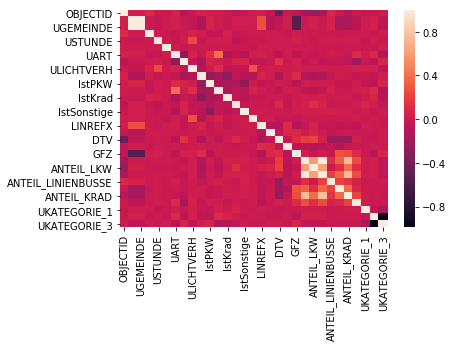

In [81]:

import matplotlib.pyplot as plt
import seaborn as sns
# Visualisierung
sns.heatmap(data=corr_matrix)
plt.show()